In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import numpy as np

from itertools import cycle, islice

from collections import defaultdict, namedtuple, OrderedDict
import pandas as pd
%matplotlib inline

In [2]:

RelData= namedtuple('RelData','layers heads transpose d2p')
relation_rules  = OrderedDict(sorted({'adj-clause-p2d': RelData([4, 7, 6, 0], [5, 6, 5, 8],False, False),
    'adj-modifier-d2p': RelData([3, 7, 6, 5], [9, 10, 5, 7],False, True),
    'adv-clause-d2p': RelData([4, 4, 8, 3], [9, 3, 8, 1],False, True),
    'adv-modifier-d2p': RelData([7, 3, 6, 8], [6, 10, 5, 5],False, True),
    'all-d2p': RelData([3, 7, 3, 4], [9, 10, 10, 5],False, True),
    'apposition-p2d': RelData([0, 9], [8, 0],False, False),
    'auxiliary-d2p': RelData([3, 8, 7, 4], [9, 5, 10, 5],False, True),
    'clausal subject-p2d': RelData([8, 0, 0, 0], [10, 8, 5, 1],False, False),
    'clausal-d2p': RelData([7, 5, 4, 8], [0, 4, 6, 8],False, True),
    'compound-d2p': RelData([3, 5, 6, 0], [9, 11, 5, 8],False, True),
    'conjunct-d2p': RelData([4, 6, 1, 5], [3, 0, 10, 4],False, True),
    'determiner-d2p': RelData([7, 3, 4, 8], [10, 9, 5, 10],False, True),
    'noun-modifier-p2d': RelData([4, 0, 0, 3], [5, 8, 1, 3],False, False),
    'num-modifier-d2p': RelData([7, 6, 3, 1], [10, 5, 10, 5],False, True),
    'object-d2p': RelData([7, 6, 4, 5], [9, 9, 6, 3],False, True),
    'other-d2p': RelData([7, 4, 8, 0], [10, 5, 5, 8],False, True),
    'punctuation-p2d': RelData([11, 7, 2, 11], [6, 7, 2, 2],False, False),
    'subject-p2d': RelData([7, 4], [11, 10],False, False),
    'adj-clause-d2p': RelData([6, 4, 0, 8], [4, 6, 3, 10],False, True),
    'adj-modifier-p2d': RelData([3, 5, 0, 4], [5, 1, 2, 7],False, False),
    'adv-clause-p2d': RelData([4, 5, 5, 0], [3, 4, 8, 8],False, False),
    'adv-modifier-p2d': RelData([7, 4, 0, 6], [3, 7, 11, 2],False, False),
    'all-p2d': RelData([1, 0, 7, 0], [4, 2, 4, 11],False, False),
    'apposition-d2p': RelData([4, 0, 4, 3], [3, 9, 9, 8],False, True),
    'auxiliary-p2d': RelData([7, 6, 7, 6], [4, 3, 3, 9],False, False),
    'clausal subject-d2p': RelData([9, 1, 2, 1], [2, 11, 4, 8],False, True),
    'clausal-p2d': RelData([5, 6, 7, 5], [7, 7, 6, 8],False, False),
    'compound-p2d': RelData([3, 6, 0, 7], [5, 5, 2, 4],False, False),
    'conjunct-p2d': RelData([5, 4, 0, 4], [5, 3, 8, 4],False, False),
    'determiner-p2d': RelData([5, 1, 3, 8], [6, 4, 2, 6],False, False),
    'noun-modifier-d2p': RelData([7, 0, 5, 0], [9, 8, 3, 7],False, True),
    'num-modifier-p2d': RelData([7, 9, 1, 0], [11, 4, 10, 8],False, False),
    'object-p2d': RelData([7, 4, 0, 3], [10, 5, 8, 9],False, False),
    'other-p2d': RelData([6, 8], [9, 6],False, False),
    'punctuation-d2p': RelData([4, 8, 3, 7], [5, 5, 9, 5],False, True),
    'subject-d2p': RelData([5, 1, 7, 7], [9, 6, 1, 8],False, True)}.items()))

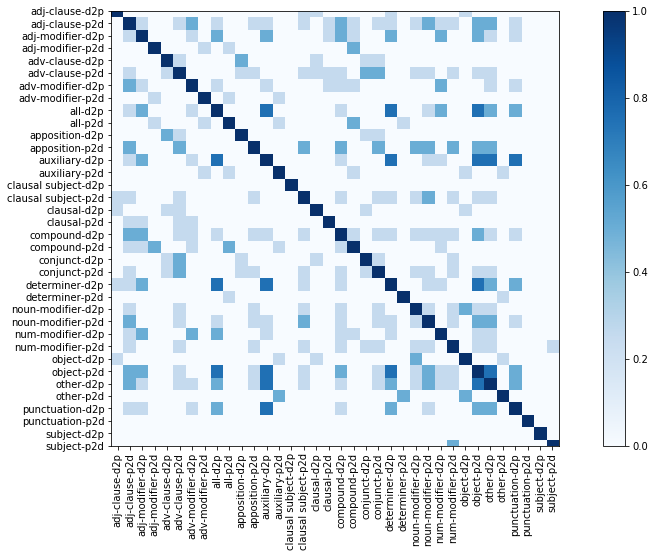

In [3]:
cross_heads = np.zeros((len(relation_rules), len(relation_rules)))
for idx, (ki, vi)  in enumerate(relation_rules.items()):
    for jdx, (kj, vj) in enumerate(relation_rules.items()):
        i_head_set = set(zip(vi.layers, vi.heads))
        j_head_set = set(zip(vj.layers, vj.heads))
        cross_heads[idx, jdx] = len(i_head_set.intersection(j_head_set))/len(i_head_set)

fig, ax = plt.subplots(1,1,figsize=(16,8))

im = ax.imshow(cross_heads,cmap='Blues')


ax.set_xticks(np.arange(len(relation_rules)))
ax.set_yticks(np.arange(len(relation_rules)))
ax.set_xticklabels(relation_rules.keys(), rotation=90)
ax.set_yticklabels(relation_rules.keys())

fig.colorbar(im, ax=ax, orientation='vertical')
    
plt.show()

In [ ]:
relation_rules2  = OrderedDict(sorted({'adj-clause-p2d': RelData([4, 7, 6, 0], [5, 6, 5, 8],False, False),
    'adj-modifier-d2p': RelData([3, 7, 6, 5], [9, 10, 5, 7],False, True),
    'adv-clause-d2p': RelData([4, 4, 8, 3], [9, 3, 8, 1],False, True),
    'adv-modifier-d2p': RelData([7, 3, 6, 8], [6, 10, 5, 5],False, True),
    'all-d2p': RelData([3, 7, 3, 4], [9, 10, 10, 5],False, True),
    'apposition-p2d': RelData([0, 9], [8, 0],False, False),
    'auxiliary-d2p': RelData([3, 8, 7, 4], [9, 5, 10, 5],False, True),
    'clausal subject-p2d': RelData([8, 0, 0, 0], [10, 8, 5, 1],False, False),
    'clausal-d2p': RelData([7, 5, 4, 8], [0, 4, 6, 8],False, True),
    'compound-d2p': RelData([3, 5, 6, 0], [9, 11, 5, 8],False, True),
    'conjunct-d2p': RelData([4, 6, 1, 5], [3, 0, 10, 4],False, True),
    'determiner-d2p': RelData([7, 3, 4, 8], [10, 9, 5, 10],False, True),
    'noun-modifier-p2d': RelData([4, 0, 0, 3], [5, 8, 1, 3],False, False),
    'num-modifier-d2p': RelData([7, 6, 3, 1], [10, 5, 10, 5],False, True),
    'object-d2p': RelData([7, 6, 4, 5], [9, 9, 6, 3],False, True),
    'other-d2p': RelData([7, 4, 8, 0], [10, 5, 5, 8],False, True),
    'punctuation-p2d': RelData([11, 7, 2, 11], [6, 7, 2, 2],False, False),
    'subject-p2d': RelData([7, 4], [11, 10],False, False),
    'adj-clause-d2p': RelData([6, 4, 0, 8], [4, 6, 3, 10],False, True),
    'adj-modifier-p2d': RelData([3, 5, 0, 4], [5, 1, 2, 7],False, False),
    'adv-clause-p2d': RelData([4, 5, 5, 0], [3, 4, 8, 8],False, False),
    'adv-modifier-p2d': RelData([7, 4, 0, 6], [3, 7, 11, 2],False, False),
    'all-p2d': RelData([1, 0, 7, 0], [4, 2, 4, 11],False, False),
    'apposition-d2p': RelData([4, 0, 4, 3], [3, 9, 9, 8],False, True),
    'auxiliary-p2d': RelData([7, 6, 7, 6], [4, 3, 3, 9],False, False),
    'clausal subject-d2p': RelData([9, 1, 2, 1], [2, 11, 4, 8],False, True),
    'clausal-p2d': RelData([5, 6, 7, 5], [7, 7, 6, 8],False, False),
    'compound-p2d': RelData([3, 6, 0, 7], [5, 5, 2, 4],False, False),
    'conjunct-p2d': RelData([5, 4, 0, 4], [5, 3, 8, 4],False, False),
    'determiner-p2d': RelData([5, 1, 3, 8], [6, 4, 2, 6],False, False),
    'noun-modifier-d2p': RelData([7, 0, 5, 0], [9, 8, 3, 7],False, True),
    'num-modifier-p2d': RelData([7, 9, 1, 0], [11, 4, 10, 8],False, False),
    'object-p2d': RelData([7, 4, 0, 3], [10, 5, 8, 9],False, False),
    'other-p2d': RelData([6, 8], [9, 6],False, False),
    'punctuation-d2p': RelData([4, 8, 3, 7], [5, 5, 9, 5],False, True),
    'subject-d2p': RelData([5, 1, 7, 7], [9, 6, 1, 8],False, True)}.items()))